In [156]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.cm as cm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import losses

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
%matplotlib inline

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [113]:
print("O dataset MNIST tem %d exemplos de treino" % len(X_train))
print("O dataset MNIST tem %d exemplos de teste" % len(X_test))

O dataset MNIST tem 60000 exemplos de treino
O dataset MNIST tem 10000 exemplos de teste


# Plotando algumas imagens

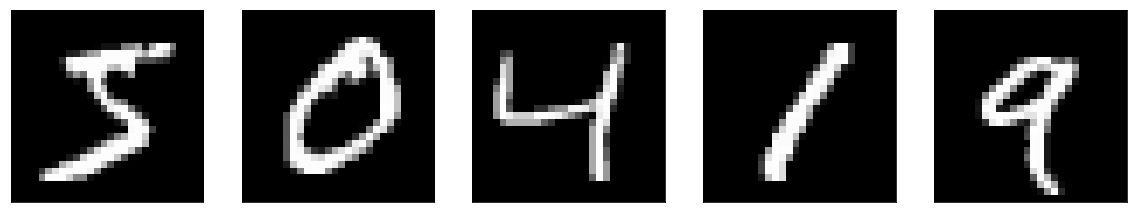

In [114]:
 fig = plt.figure(figsize=(20,20))
for i in range (5):
    im = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    im.imshow(X_train[i], cmap="gray")


# Escalando as imagens

In [115]:
# Escala [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

X_train[1].shape


(28, 28)

# Criando modelo

In [162]:

def create_model(p):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(units= 64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total para

In [124]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [125]:

X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

## optmizer = rmsprop  e loss =  categorical_crossentropy

In [126]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 6s 1ms/step - loss: 0.6634 - acc: 0.7952 - val_loss: 0.2409 - val_acc: 0.9280
Epoch 2/10
6000/6000 [==============================] - 5s 798us/step - loss: 0.1796 - acc: 0.9482 - val_loss: 0.1373 - val_acc: 0.9630
Epoch 3/10
6000/6000 [==============================] - 4s 735us/step - loss: 0.1235 - acc: 0.9645 - val_loss: 0.1612 - val_acc: 0.9500
Epoch 4/10
6000/6000 [==============================] - 4s 750us/step - loss: 0.0860 - acc: 0.9768 - val_loss: 0.1292 - val_acc: 0.9650
Epoch 5/10
6000/6000 [==============================] - 4s 739us/step - loss: 0.0664 - acc: 0.9798 - val_loss: 0.0956 - val_acc: 0.9740
Epoch 6/10
6000/6000 [==============================] - 4s 720us/step - loss: 0.0498 - acc: 0.9873 - val_loss: 0.1168 - val_acc: 0.9620
Epoch 7/10
6000/6000 [==============================] - 5s 818us/step - loss: 0.0344 - acc: 0.9912 - val_loss: 0.1277 - val_acc: 0.9640
Ep

## optmizer = SGD e loss =  categorical_crossentropy

In [131]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss='categorical_crossentropy',
metrics=['accuracy'])
history1 = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 744us/step - loss: 0.0030 - acc: 0.9997 - val_loss: 0.0981 - val_acc: 0.9790
Epoch 2/10
6000/6000 [==============================] - 4s 744us/step - loss: 0.0029 - acc: 0.9997 - val_loss: 0.0981 - val_acc: 0.9790
Epoch 3/10
6000/6000 [==============================] - 5s 759us/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.0991 - val_acc: 0.9790
Epoch 4/10
6000/6000 [==============================] - 5s 766us/step - loss: 0.0027 - acc: 0.9997 - val_loss: 0.0987 - val_acc: 0.9790
Epoch 5/10
6000/6000 [==============================] - 4s 723us/step - loss: 0.0027 - acc: 0.9997 - val_loss: 0.0987 - val_acc: 0.9810
Epoch 6/10
6000/6000 [==============================] - 4s 709us/step - loss: 0.0026 - acc: 0.9998 - val_loss: 0.0991 - val_acc: 0.9810
Epoch 7/10
6000/6000 [==============================] - 5s 911us/step - loss: 0.0025 - acc: 0.9998 - val_loss: 0.0997 - val_acc: 0.9790


## optmizer = SGDe loss =  categorical_hinge

In [134]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.categorical_hinge,
metrics=['accuracy'])
history2 = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 804us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0473 - val_acc: 0.9800
Epoch 2/10
6000/6000 [==============================] - 5s 850us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0470 - val_acc: 0.9800
Epoch 3/10
6000/6000 [==============================] - 5s 867us/step - loss: 0.0030 - acc: 0.9998 - val_loss: 0.0468 - val_acc: 0.9800
Epoch 4/10
6000/6000 [==============================] - 6s 938us/step - loss: 0.0029 - acc: 0.9998 - val_loss: 0.0470 - val_acc: 0.9800
Epoch 5/10
6000/6000 [==============================] - 5s 793us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0471 - val_acc: 0.9800
Epoch 6/10
6000/6000 [==============================] - 5s 862us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0471 - val_acc: 0.9800
Epoch 7/10
6000/6000 [==============================] - 5s 844us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0468 - val_acc: 0.9800


## optmizer = SGD  e loss =  mean_absolute_error

In [136]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
loss=losses.mean_absolute_error,
metrics=['accuracy'])
history3 = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 768us/step - loss: 2.5808e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 2/10
6000/6000 [==============================] - 4s 699us/step - loss: 2.5757e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 3/10
6000/6000 [==============================] - 4s 702us/step - loss: 2.5685e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 4/10
6000/6000 [==============================] - 4s 705us/step - loss: 2.5637e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 5/10
6000/6000 [==============================] - 5s 778us/step - loss: 2.5571e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 6/10
6000/6000 [==============================] - 4s 694us/step - loss: 2.5523e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 7/10
6000/6000 [==============================] - 5s 866us/step - loss: 2.5451e-04 - acc: 1.0000 - val_los

## optmizer = ADELTA  e loss =  mean_absolute_error

In [140]:
adelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

In [142]:
model.compile(optimizer=adelta,
loss=losses.mean_absolute_error,
metrics=['accuracy'])
history4 = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 820us/step - loss: 1.8332e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9790
Epoch 2/10
6000/6000 [==============================] - 5s 755us/step - loss: 1.5638e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9800
Epoch 3/10
6000/6000 [==============================] - 4s 717us/step - loss: 1.3101e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9790
Epoch 4/10
6000/6000 [==============================] - 4s 728us/step - loss: 1.2102e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9790
Epoch 5/10
6000/6000 [==============================] - 5s 864us/step - loss: 1.0086e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9790
Epoch 6/10
6000/6000 [==============================] - 6s 965us/step - loss: 9.7161e-05 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9780
Epoch 7/10
6000/6000 [==============================] - 6s 963us/step - loss: 8.6469e-05 - acc: 1.0000 - val_los

## optmizer = SGD  e loss =  cosine_proximity

In [151]:
model.compile(optimizer=sgd,
loss=keras.losses.cosine_proximity,
metrics=['accuracy'])
history4 = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 806us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 2/10
6000/6000 [==============================] - 4s 711us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 3/10
6000/6000 [==============================] - 4s 714us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 4/10
6000/6000 [==============================] - 4s 719us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 5/10
6000/6000 [==============================] - 4s 723us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 6/10
6000/6000 [==============================] - 5s 760us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - val_acc: 0.9790
Epoch 7/10
6000/6000 [==============================] - 5s 754us/step - loss: -1.0000 - acc: 1.0000 - val_loss: -0.9815 - va

In [167]:
model = create_model(0.3)

In [174]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')



train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


In [181]:
def compiler(model):
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
    loss=losses.categorical_hinge,
    metrics=['accuracy'])
    return model

In [179]:
historyD0 = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=5, 
                                validation_data=(X_valid, X_valid_labels))

Epoch 1/5
300/300 [==============================] - 6s 20ms/step - loss: 1.0011 - acc: 0.1123 - val_loss: 1.0005 - val_acc: 0.1070
Epoch 2/5
300/300 [==============================] - 6s 20ms/step - loss: 1.0006 - acc: 0.1098 - val_loss: 1.0003 - val_acc: 0.0910
Epoch 3/5
300/300 [==============================] - 6s 20ms/step - loss: 1.0003 - acc: 0.0963 - val_loss: 1.0002 - val_acc: 0.0870
Epoch 4/5
300/300 [==============================] - 6s 20ms/step - loss: 1.0002 - acc: 0.1017 - val_loss: 1.0001 - val_acc: 0.0850
Epoch 5/5
300/300 [==============================] - 6s 21ms/step - loss: 1.0001 - acc: 0.1093 - val_loss: 1.0001 - val_acc: 0.0900


## optmizer = SGDe loss =  categorical_hinge 

In [184]:
model = create_model(0.5)
model = compiler(model)
historyD0 = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=100,
                                validation_data=(X_valid, X_valid_labels))

Epoch 1/100
300/300 [==============================] - 7s 24ms/step - loss: 2.0318 - acc: 0.2668 - val_loss: 1.2355 - val_acc: 0.6610
Epoch 2/100
300/300 [==============================] - 6s 19ms/step - loss: 1.6718 - acc: 0.4165 - val_loss: 0.9162 - val_acc: 0.7580
Epoch 3/100
300/300 [==============================] - 6s 21ms/step - loss: 1.4635 - acc: 0.4913 - val_loss: 0.8163 - val_acc: 0.7440
Epoch 4/100
300/300 [==============================] - 7s 23ms/step - loss: 1.2952 - acc: 0.5637 - val_loss: 0.6455 - val_acc: 0.8090
Epoch 5/100
300/300 [==============================] - 7s 24ms/step - loss: 1.1868 - acc: 0.6073 - val_loss: 0.5725 - val_acc: 0.8200
Epoch 6/100
300/300 [==============================] - 8s 26ms/step - loss: 1.1010 - acc: 0.6277 - val_loss: 0.5933 - val_acc: 0.7870
Epoch 7/100
300/300 [==============================] - 7s 23ms/step - loss: 1.0187 - acc: 0.6528 - val_loss: 0.5336 - val_acc: 0.8390
Epoch 8/100
300/300 [==============================] - 7s 23ms

Epoch 62/100
300/300 [==============================] - 6s 20ms/step - loss: 0.4673 - acc: 0.8577 - val_loss: 0.2448 - val_acc: 0.9350
Epoch 63/100
300/300 [==============================] - 7s 22ms/step - loss: 0.4672 - acc: 0.8520 - val_loss: 0.1912 - val_acc: 0.9490
Epoch 64/100
300/300 [==============================] - 6s 21ms/step - loss: 0.4863 - acc: 0.8497 - val_loss: 0.1607 - val_acc: 0.9520
Epoch 65/100
300/300 [==============================] - 7s 22ms/step - loss: 0.4970 - acc: 0.8482 - val_loss: 0.1965 - val_acc: 0.9460
Epoch 66/100
300/300 [==============================] - 6s 20ms/step - loss: 0.4827 - acc: 0.8478 - val_loss: 0.1557 - val_acc: 0.9510
Epoch 67/100
300/300 [==============================] - 6s 20ms/step - loss: 0.4718 - acc: 0.8540 - val_loss: 0.2993 - val_acc: 0.9150
Epoch 68/100
300/300 [==============================] - 6s 20ms/step - loss: 0.4653 - acc: 0.8550 - val_loss: 0.2233 - val_acc: 0.9370
Epoch 69/100
300/300 [==============================] -